<a href="https://colab.research.google.com/github/Tong-Zhong/Sentiment_Analysis_with_spacy/blob/main/2021_UNH_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

掛接雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#前置作業

In [ ]:
#設定--不顯示python輸出的警告
import warnings #有關python輸出的警告
warnings.filterwarnings("ignore") #不顯示python輸出的警告
#warnings.filterwarnings("always") #顯示python輸出的警告

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-12-30 17:19:30--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.196.100, 173.194.196.101, 173.194.196.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.196.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1c959ju2csj2c1geidvhklv1lbhlq1n4/1672420725000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=58600758-6b2c-4e5c-aa50-3783922f505c [following]
--2022-12-30 17:19:34--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1c959ju2csj2c1geidvhklv1lbhlq1n4/1672420725000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=58600758-6b2c-4e5c-aa50-3783922f505c
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.196.132, 2607:f8b0:4001:c1a::84
Connecting to d

In [ ]:
!pip install spacytextblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#匯入套件
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

#斷詞、斷句分析

##斷詞

In [ ]:
with open('/content/drive/MyDrive/大數據專題/畢專/UNH_2021_Q4_20220119發布.txt') as f :
  text = f.readlines()
text = ' '.join(text)
# text

In [ ]:
#將資料print出來 (這邊可跑可不跑)
# doc = nlp(text)
# for token in doc:
#   print(f'{token.i}  {token.text}  {token._.polarity}  {token._.subjectivity}  {spacy.explain(token.pos_)}  {spacy.explain(token.dep_)}  {spacy.explain(token.tag_)}  {token.is_alpha}  {token.is_stop}  {token.is_punct}  {token.like_num}')

#token.i index
#token.text 單字
#token._.polarity 極性
#token._.subjectivity 主觀性
#spacy.explain(token.pos_) 詞性
#spacy.explain(token.dep_) 詞在句子中的定位
#token.is_alpha 是否為全字母
#token.is_stop 是否為停用詞
#token.is_punct 是否為標點符號
#token.like_num 是否為數字

In [ ]:
#建成DataFrame
doc = nlp(text)
cols = ("Word", "Polarity", "Subjectivity","Pos_", "Dep_", "Alpha", "Stopword", "Punct", "Num")
rows = []
for token in doc:    
    row = [token.text, token._.polarity, token._.subjectivity, spacy.explain(token.pos_),   spacy.explain(token.dep_) ,token.is_alpha, token.is_stop, token.is_punct, token.like_num]    
    rows.append(row)
df = pd.DataFrame(rows, columns=cols)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,UnitedHealth,0.0,0.0,proper noun,compound,True,False,False,False
1,Group,0.0,0.0,proper noun,compound,True,False,False,False
2,Incorporated,0.0,0.0,proper noun,root,True,False,False,False
3,(,0.0,0.0,punctuation,punctuation,False,False,True,False
4,NYSE,0.0,0.0,proper noun,appositional modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
8633,you,0.0,0.0,pronoun,direct object,True,True,False,False
8634,for,0.0,0.0,adposition,prepositional modifier,True,True,False,False
8635,your,0.0,0.0,pronoun,possession modifier,True,True,False,False
8636,participation,0.0,0.0,noun,object of preposition,True,False,False,False


In [ ]:
#查看資料
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8638 entries, 0 to 8637
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Word          8638 non-null   object 
 1   Polarity      8638 non-null   float64
 2   Subjectivity  8638 non-null   float64
 3   Pos_          8638 non-null   object 
 4   Dep_          8636 non-null   object 
 5   Alpha         8638 non-null   bool   
 6   Stopword      8638 non-null   bool   
 7   Punct         8638 non-null   bool   
 8   Num           8638 non-null   bool   
dtypes: bool(4), float64(2), object(3)
memory usage: 371.3+ KB


In [ ]:
# 將stopword、punct、num=True，以及Alpha=False的字刪除
df.drop(df[(df.Alpha == False)|(df.Stopword == True)|(df.Punct == True)|(df.Num == True)].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,UnitedHealth,0.0,0.0,proper noun,compound,True,False,False,False
1,Group,0.0,0.0,proper noun,compound,True,False,False,False
2,Incorporated,0.0,0.0,proper noun,root,True,False,False,False
4,NYSE,0.0,0.0,proper noun,appositional modifier,True,False,False,False
6,UNH,0.0,0.0,proper noun,modifier of nominal,True,False,False,False
...,...,...,...,...,...,...,...,...,...
8626,conclude,0.0,0.0,verb,root,True,False,False,False
8627,today,0.0,0.0,noun,possession modifier,True,False,False,False
8629,conference,0.0,0.0,noun,direct object,True,False,False,False
8632,thank,0.0,0.0,verb,root,True,False,False,False


**Pos_被刪除的詞性涵義：**
* proper noun(專有名詞)
* adposition(同位語on, in, for, towards)
* auxiliary(助動詞 is、will do)
* coordinating conjunction(並列連詞for、and)
* numeral(數字)
* pronoun(代詞)
* subordinating conjunction(從屬連詞because、when)

In [ ]:
#將'Pos_'的'proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'刪除
df.drop(df[df['Pos_'].isin(['proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
129,morning,0.0,0.0,noun,root,True,False,False,False
132,welcome,0.8,0.9,adjective,conjunct,True,False,False,False
148,question,0.0,0.0,noun,modifier of nominal,True,False,False,False
152,answer,0.0,0.0,noun,conjunct,True,False,False,False
153,session,0.0,0.0,noun,nominal subject,True,False,False,False
...,...,...,...,...,...,...,...,...,...
8626,conclude,0.0,0.0,verb,root,True,False,False,False
8627,today,0.0,0.0,noun,possession modifier,True,False,False,False
8629,conference,0.0,0.0,noun,direct object,True,False,False,False
8632,thank,0.0,0.0,verb,root,True,False,False,False


In [ ]:
#將Dep_的'auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
#'open clausal complement','punctuation','modifier of quantifier'刪除
df.drop(df[df['Dep_'].isin(['auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
'open clausal complement', 'punctuation','modifier of quantifier', 'object of preposition', 'attribute',  'modifier of nominal', 'prepositional modifier', 'appositional modifier', 
'possession modifier', 'nominal subject (passive)', 'punctuation', 'dative', 'numeric modifier' ])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
129,morning,0.0,0.0,noun,root,True,False,False,False
155,follow,0.0,0.0,verb,root,True,False,False,False
158,prepared,0.0,0.0,verb,adjectival modifier,True,False,False,False
159,remarks,0.0,0.0,noun,direct object,True,False,False,False
169,recorded,0.0,0.0,verb,root,True,False,False,False
...,...,...,...,...,...,...,...,...,...
8613,thanks,0.2,0.2,noun,noun phrase as adverbial modifier,True,False,False,False
8619,Goodbye,0.0,0.0,noun,root,True,False,False,False
8626,conclude,0.0,0.0,verb,root,True,False,False,False
8629,conference,0.0,0.0,noun,direct object,True,False,False,False


In [ ]:
#將'Pos_'&'Dep_'共同條件的['coordinating conjunction', 'coordinating conjunction'] ,['noun', 'direct object'] ,['verb', 'direct object'] ,['noun','adverbial clause modifier'] 
#['verb', 'adverbial clause modifier'],['verb' ,'clausal complement'] ,['noun' ,'clausal complement'] ,['verb', 'relative clause modifier'] ,['noun', 'noun phrase as adverbial modifier'],
#['verb', 'clausal subject'] ,['interjection', 'interjection'] ,['verb','root'] ,['noun','root'] 刪除
df.drop(df[(df.Pos_ == 'coordinating conjunction') & (df.Dep_ == 'coordinating conjunction') | (df.Pos_ == 'noun') & (df.Dep_ == 'direct object') | 
(df.Pos_ == 'verb') & (df.Dep_ == 'direct object') | (df.Pos_ == 'noun') & (df.Dep_ == 'adverbial clause modifier') |
(df.Pos_ == 'verb') & (df.Dep_ == 'adverbial clause modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal complement') |
(df.Pos_ == 'noun') & (df.Dep_ == 'clausal complement') | (df.Pos_ == 'verb') & (df.Dep_ == 'relative clause modifier')|
(df.Pos_ == 'noun') & (df.Dep_ == 'noun phrase as adverbial modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal subject')|
(df.Pos_ == 'interjection') & (df.Dep_ == 'interjection') | (df.Pos_ == 'verb') & (df.Dep_ == 'root') | (df.Pos_ == 'noun') & (df.Dep_ == 'root') ].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
158,prepared,0.000000,0.000000,verb,adjectival modifier,True,False,False,False
174,important,0.400000,1.000000,adjective,adjectival modifier,True,False,False,False
175,introductory,0.000000,0.000000,adjective,adjectival modifier,True,False,False,False
181,forward,0.000000,0.000000,adverb,adverbial modifier,True,False,False,False
183,looking,0.000000,0.000000,verb,adjectival modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
8528,certainly,0.214286,0.571429,adverb,adverbial modifier,True,False,False,False
8561,confident,0.500000,0.833333,adjective,adjectival complement,True,False,False,False
8566,continue,0.000000,0.000000,verb,clausal modifier of noun (adjectival clause),True,False,False,False
8569,high,0.160000,0.540000,adjective,adjectival modifier,True,False,False,False


In [ ]:
#查看'Polarity'描述
df['Polarity'].describe()

count    655.000000
mean       0.116396
std        0.231172
min       -0.500000
25%        0.000000
50%        0.000000
75%        0.238636
max        1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
df['Subjectivity'].describe()

count    655.000000
mean       0.312667
std        0.351989
min        0.000000
25%        0.000000
50%        0.125000
75%        0.543561
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective',放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
df['Opinion'] = df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num,Sentiment,Opinion
158,prepared,0.000000,0.000000,verb,adjectival modifier,True,False,False,False,Neutral,Objective
174,important,0.400000,1.000000,adjective,adjectival modifier,True,False,False,False,Positive,Subjective
175,introductory,0.000000,0.000000,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
181,forward,0.000000,0.000000,adverb,adverbial modifier,True,False,False,False,Neutral,Objective
183,looking,0.000000,0.000000,verb,adjectival modifier,True,False,False,False,Neutral,Objective
...,...,...,...,...,...,...,...,...,...,...,...
8528,certainly,0.214286,0.571429,adverb,adverbial modifier,True,False,False,False,Positive,Subjective
8561,confident,0.500000,0.833333,adjective,adjectival complement,True,False,False,False,Positive,Subjective
8566,continue,0.000000,0.000000,verb,clausal modifier of noun (adjectival clause),True,False,False,False,Neutral,Objective
8569,high,0.160000,0.540000,adjective,adjectival modifier,True,False,False,False,Positive,Subjective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
total_count = df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
total_count

,Sentiment,Opinion,總數
0,Negative,Objective,1
1,Negative,Subjective,48
2,Neutral,Objective,313
3,Neutral,Subjective,70
4,Positive,Subjective,223


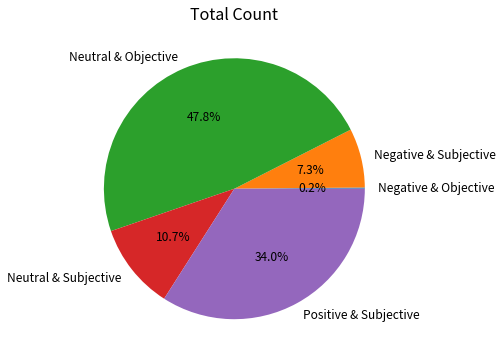

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
size = total_count["總數"].values
label = ["Negative & Objective","Negative & Subjective", "Neutral & Objective", "Neutral & Subjective","Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷詞分析由 Neutral & Objective占多數**

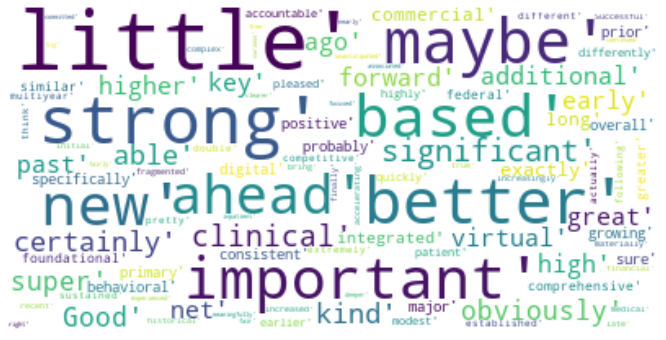

In [ ]:
#文字雲
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
# Create and generate a word cloud image:
kl = df["Word"].values
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(kl))
plt.figure(figsize=(20,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##斷句

In [ ]:
#看polarity、subjectivity、assessments(可跑可不跑)
# ※assessments 後面DataFrame沒有

# _aapl_2021q1_path = '/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt'
# _aapl_2021q1_readfile = open(_aapl_2021q1_path).read()
# text = _aapl_2021q1_readfile
# doc = nlp(text)
# for sentence in doc.sents:
#   sentence_list.append(sentence)
#   print('句子',f'{sentence.text}  {sentence._.polarity}  {sentence._.subjectivity}'
#   ,'\n','依據',sentence._.blob.sentiment_assessments.assessments)

# doc._.polarity                          
# doc._.subjectivity                      
# doc._.blob.sentiment_assessments.assessments   # Assessments:評估polarity、subjectivity 的依據列表 
# doc._.blob.ngrams()  #計算字的出現頻率

In [ ]:
#建成DataFrame
# with open('/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt') as f :
#   text = f.read()
  
doc = nlp(text)

_cols = ("Sentence", "Polarity", "Subjectivity")
_rows = []
for _token in doc.sents:    
    _row = [_token.text, _token._.polarity, _token._.subjectivity] #_token._.blob.sentiment_assessments.assessments 
    _rows.append(_row)
_df = pd.DataFrame(_rows, columns=_cols)
_df

,Sentence,Polarity,Subjectivity
0,UnitedHealth Group Incorporated (NYSE:UNH) Q4 ...,0.25000,0.50
1,"Wyatt Decker - Chief Executive Officer, OptumH...",0.00000,0.00
2,Call ParticipantsScott Fidel - StephensJosh,0.00000,0.00
3,Raskin - Nephron ResearchJustin Lake - Wolfe R...,0.38125,0.55
4,A question-and-answer session will follow Unit...,0.00000,0.00
...,...,...,...
433,"In the meantime, thanks so much for your atten...",0.20000,0.20
434,Goodbye.,0.00000,0.00
435,OperatorThank you.,0.00000,0.00
436,This does conclude today's conference.,0.00000,0.00


In [ ]:
#查看'Polarity'描述
_df['Polarity'].describe()

count    438.000000
mean       0.139109
std        0.194929
min       -0.300000
25%        0.000000
50%        0.048333
75%        0.250000
max        1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
_df['Subjectivity'].describe()

count    438.000000
mean       0.303828
std        0.296597
min        0.000000
25%        0.000000
50%        0.250000
75%        0.500000
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
_df['Sentiment'] = _df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective'放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
_df['Opinion'] = _df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
_df

,Sentence,Polarity,Subjectivity,Sentiment,Opinion
0,UnitedHealth Group Incorporated (NYSE:UNH) Q4 ...,0.25000,0.50,Positive,Subjective
1,"Wyatt Decker - Chief Executive Officer, OptumH...",0.00000,0.00,Neutral,Objective
2,Call ParticipantsScott Fidel - StephensJosh,0.00000,0.00,Neutral,Objective
3,Raskin - Nephron ResearchJustin Lake - Wolfe R...,0.38125,0.55,Positive,Subjective
4,A question-and-answer session will follow Unit...,0.00000,0.00,Neutral,Objective
...,...,...,...,...,...
433,"In the meantime, thanks so much for your atten...",0.20000,0.20,Positive,Subjective
434,Goodbye.,0.00000,0.00,Neutral,Objective
435,OperatorThank you.,0.00000,0.00,Neutral,Objective
436,This does conclude today's conference.,0.00000,0.00,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
_total_count = _df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
_total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,21
1,Neutral,Objective,153
2,Neutral,Subjective,37
3,Positive,Subjective,227


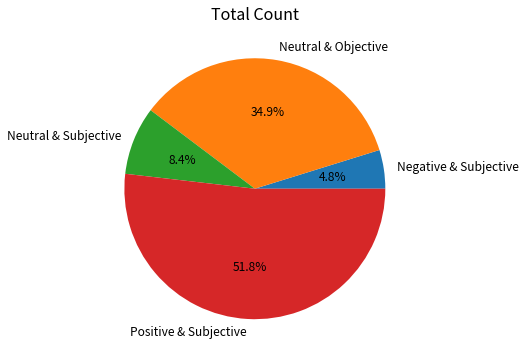

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
_size = _total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective","Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(_size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷句分析由 Positive & Subjective占多數**

In [ ]:
#查看'Negative','Subjective'的句子
neg_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Negative') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neg_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neg_sub_j+=1

1)These statements are subject to risks and uncertainties and that could cause actual results to differ materially from historical experience or present expectations.

2)In sum, we enter 2022 with heightened confidence in our ability to execute upon the objectives we set forth in late November.

3)We find it to be an essential and sometimes complex shift in what our long-held fee-for-service practices.

4)Beyond education, we ramp up our capacity in the form of physicians, nurses and other clinicians to meet the requirements of our business.

5)At the same time, we responded swiftly to the federal mandate for cash-free COVID test for consumers, a highly complex undertaking.

6)My question was just a little follow-up just on the Medicare Advantage environment.

7)And Scott, just your secondary on distribution.

8)One way that helps me think this through a little bit is to think about vintages.

9)I remember correctly, commercial was running a little bit hotter than Medicare and Medicaid

In [ ]:
#查看'Neutral','Objective'的句子
neu_ob_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Objective'):
    print(str(neu_ob_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_ob_j+=1

1)Wyatt Decker - Chief Executive Officer, OptumHealthBrian Thompson - Chief Financial Officer, UnitedHealthcare Employer & IndividualTim Spilker - Chief Executive Officer, UnitedHealth GroupHeather Cianfrocco - Chief Executive Officer, OptumRxConference

2)Call ParticipantsScott Fidel - StephensJosh

3)A question-and-answer session will follow UnitedHealth Group prepared remarks.

4)As a reminder, this call is being recorded.

5)This call contains forward-looking statements under U.S. federal securities laws.

6)This call will also reference non-GAAP amounts.

7)Information presented on this call is contained in the earnings release we issued this morning and in our Form 8-K dated January 19, 2022, which may be accessed from the Investor Relations page of the Company's website.

8)Andrew WittyThank you.

9)These, and the broader performance across the enterprise, confirm our comfort in our ability to advance our stated growth strategies and to support our long-term 13% to 16% EPS growt

In [ ]:
#查看'Neutral','Subjective'的句子
neu_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neu_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_sub_j+=1

1)A description of some of the risks and uncertainties can be found in the reports that we file with the Securities and Exchange Commission including the cautionary statements included in our current and periodic filings.

2)And you should expect similar growth in the year ahead.

3)At our investor conference, we shared five key areas for growth and for differentiated experiences across our portfolio.

4)Fourth, health financial services, vastly improved in the health payment sector, streamlining and simplifying payments for providers, payers and consumers while reducing friction and increasing speed and convenience.

5)We expect this expertise will serve us well as we transition even larger groups of patients in the years to come.

6)For those people needing inpatient care, severity is seemingly lower as we are seeing shorter lengths of stay compared to that earlier period.

7)Moving now to our specific business performance.

8)Our expanding relationships serving health systems has be

In [ ]:
#查看'Positive','Subjective'的句子
pos_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Positive') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(pos_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    pos_sub_j+=1

1)UnitedHealth Group Incorporated (NYSE:UNH) Q4 2021 Earnings Conference Call January 19, 2022 8:45 AM ETCompany ParticipantsAndrew Witty - Chief Executive OfficerDirk McMahon - President and Chief Operating OfficerJohn Rex - Chief Financial OfficerTim Noel - Chief Executive Officer, Medicare & RetirementDr.

2)Raskin - Nephron ResearchJustin Lake - Wolfe ResearchKevin Fischbeck - Bank of AmericaStephen Baxter - Wells FargoRicky Goldwasser - Morgan StanleyA.J. Rice - Credit SuisseMatt Borsch - BMO Capital MarketsNathan Rich - Goldman SachsGary Taylor - CowenLance Wilkes - BernsteinSteven Valiquette - BarclaysOperatorGood morning, and welcome to the UnitedHealth Group Fourth Quarter and Full Year 2021 Earnings Conference Call.

3)Here are some important introductory information.

4)A reconciliation of the non-GAAP to GAAP amounts is available on the financial and earnings reports section of the Company's Investor Relations page at www.unitedhealthgroup.com.

5)I will now turn the confer

#結果


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

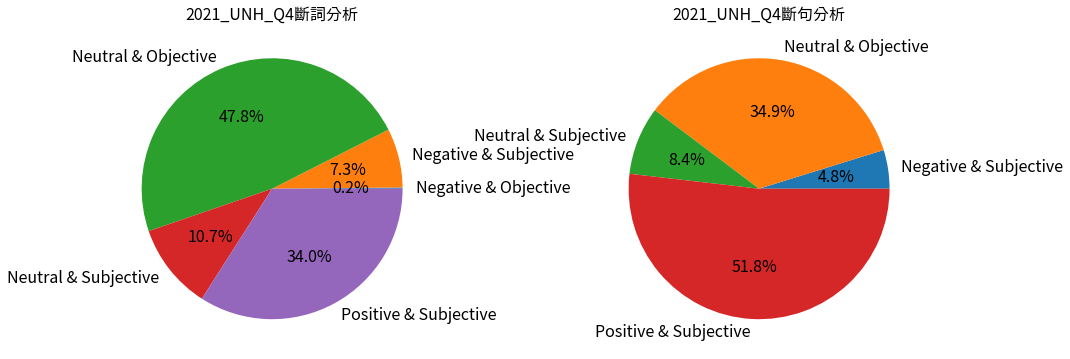

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
size = total_count["總數"].values
_size = _total_count["總數"].values
label1 = ["Negative & Objective","Negative & Subjective", "Neutral & Objective", "Neutral & Subjective","Positive & Subjective"]
label2 = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective","Positive & Subjective"]

axs[0].pie(size, labels=label1, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16} )
axs[0].set_title('2021_UNH_Q4斷詞分析', fontsize=16)


axs[1].pie(_size, labels=label2, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16})
axs[1].set_title('2021_UNH_Q4斷句分析', fontsize=16)


plt.savefig("2021_UNH_Q4.png")
from google.colab import files
files.download("2021_UNH_Q4.png")

#HTML

In [ ]:
#%%shell
#jupyter nbconvert --to html '剛複製的路徑'

%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb to html
[NbConvertApp] Writing 619650 bytes to /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.html


5家公司，4季，2年 =5* 4 * 2=40